Scipy: <br>
We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. <br>
Task: <br>
1.fitting it to the periodic function <br>
2.plot the fit <br>
Data <br>
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 <br>
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
%matplotlib inline

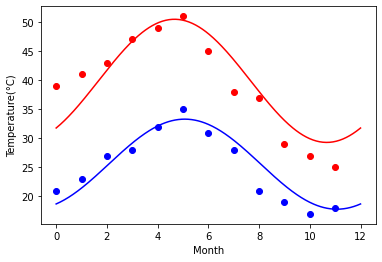

In [2]:
Mth = np.array([0,1,2,3,4,5,6,7,8,9,10,11])
Max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, Mth, Max,[20,10,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, Mth, Min,[-40,20,0])

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(Mth, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(Mth, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature(°C)')

plt.show()

Matplotlib: <br>
This assignment is for visualization using matplotlib: <br>
data to use: <br>
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv <br>
titanic = pd.read_csv(url) <br>
Charts to plot: <br>
1. Create a pie chart presenting the male/female proportion <br>
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender <br>

In [3]:
import pandas as pd

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
titanic = titanic[titanic['sex'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.4+ KB


array([<AxesSubplot:ylabel='sex'>], dtype=object)

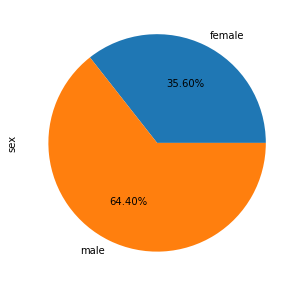

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))
titanic.groupby(['sex'])['sex'].count().plot(kind='pie',ax=ax,subplots=True,autopct='%.2f%%')

<AxesSubplot:xlabel='age', ylabel='fare'>

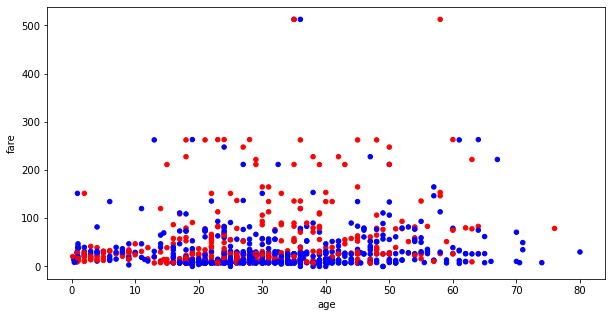

In [7]:
colors = {'male':'blue', 'female':'red'}
fig, ax = plt.subplots(figsize=(10, 5))
titanic.plot.scatter('age','fare',ax=ax,c=titanic['sex'].map(colors))